In [104]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [71]:
df = pd.read_csv("hmelq.csv")

In [72]:
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [67]:
df.shape

In [65]:
df.info()

In [64]:
df.describe()

In [73]:
df.isnull().values.any()

True

In [77]:
df.job.value_counts()

Other     1598
ProfEx     767
Office     569
Mgr        461
Self       115
Sales       66
Name: job, dtype: int64

In [78]:
df.reason.value_counts()

DebtCon    2518
HomeImp    1058
Name: reason, dtype: int64

In [74]:
#Missing values
df.clno.fillna(df.clno.median(), inplace=True)
df['derog'].fillna(value = 0,inplace = True)
df.clage.fillna(df.clage.mean(), inplace=True)
df.debtinc.fillna(df.clage.mean(), inplace=True)
df['ninq'].fillna(value = 0,inplace = True)
df['delinq'].fillna(value = 0,inplace = True)
df.value.fillna(df.value.mean(), inplace=True)
df.mortdue.fillna(df.mortdue.mean(), inplace=True)
df['reason'].fillna(value = 'DebtCon',inplace = True)
df['job'].fillna(value = 'Other',inplace = True)
df.yoj.fillna(df.yoj.mean(), inplace=True)

In [75]:
df.isnull().values.any()

False

In [79]:
df.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.053533,-0.048496,-0.049853,0.265590,0.338005,-0.146204,0.175898,-0.009160,0.563746
loan,-0.071523,1.000000,0.217712,0.333597,0.117563,0.005027,-0.016308,0.087312,0.059479,0.094188,-0.085718
mortdue,-0.053533,0.217712,1.000000,0.801734,-0.083948,-0.050266,-0.003888,0.132132,0.029534,0.320977,-0.047166
value,-0.048496,0.333597,0.801734,1.000000,0.002329,-0.049308,-0.001834,0.178965,0.006075,0.286443,-0.038986
yoj,-0.049853,0.117563,-0.083948,0.002329,1.000000,-0.062947,0.072602,0.174704,-0.052171,0.017991,-0.021485
derog,0.265590,0.005027,-0.050266,-0.049308,-0.062947,1.000000,0.189147,-0.081743,0.136388,0.039735,0.185673
delinq,0.338005,-0.016308,-0.003888,-0.001834,0.072602,0.189147,1.000000,0.045382,0.081721,0.149054,0.235507
clage,-0.146204,0.087312,0.132132,0.178965,0.174704,-0.081743,0.045382,1.000000,-0.105281,0.215665,-0.079912
ninq,0.175898,0.059479,0.029534,0.006075,-0.052171,0.136388,0.081721,-0.105281,1.000000,0.097289,0.168590
clno,-0.009160,0.094188,0.320977,0.286443,0.017991,0.039735,0.149054,0.215665,0.097289,1.000000,0.037555


## Plotlar

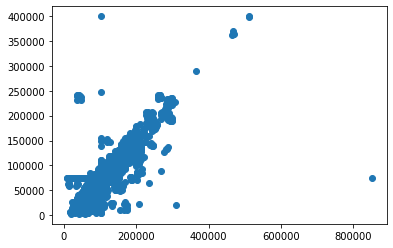

In [80]:
plt.scatter(x='value' , y='mortdue' ,data=df)

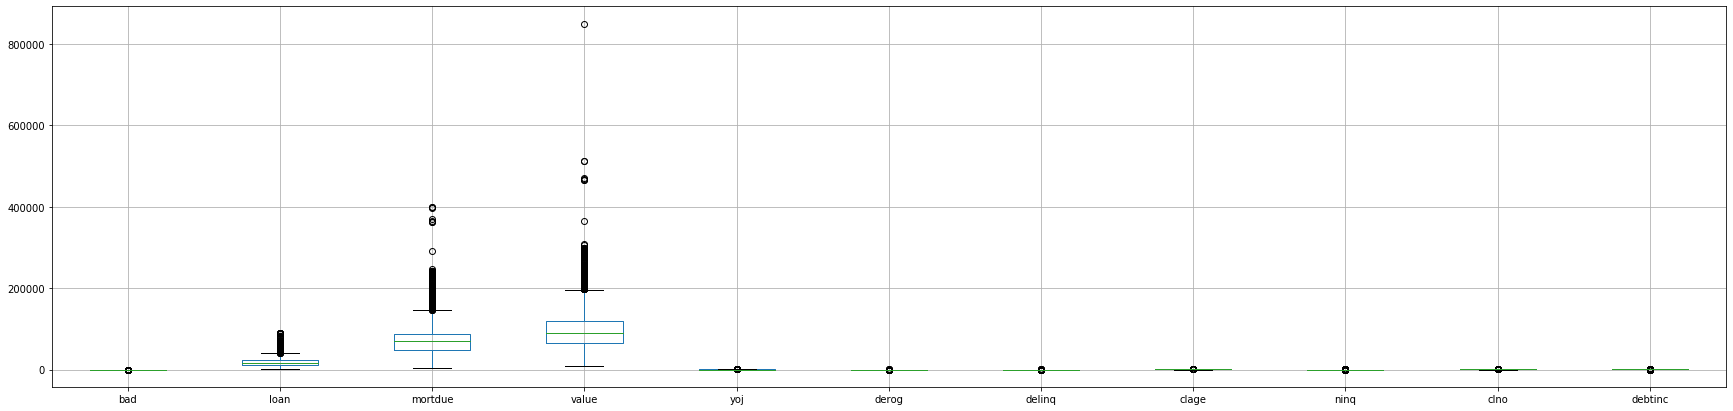

In [84]:
plt.figure(figsize=(30,7))
df.boxplot()
plt.show()

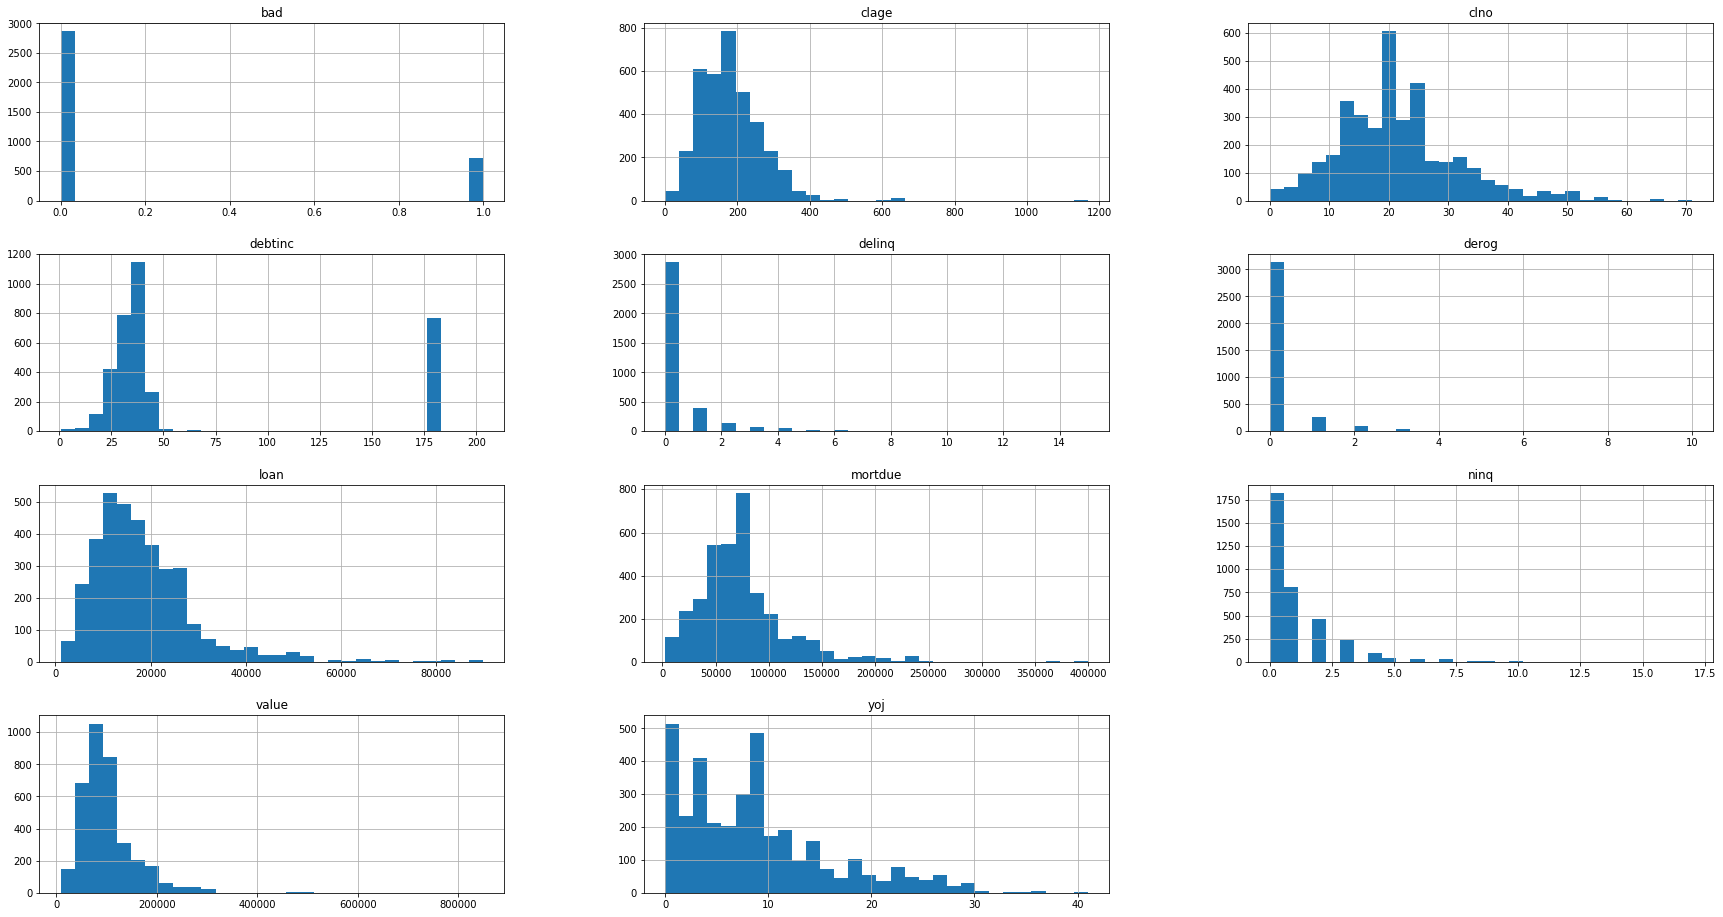

In [88]:
df.hist(figsize=(30,16), bins=30)
plt.show()

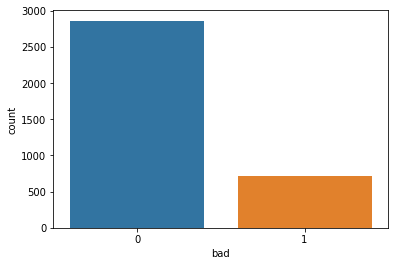

In [89]:
sns.countplot(x=df.bad)

## Cross Tables

In [ ]:
bad_credit =  pd.crosstab(index = df["bad"], columns = df["job"] , normalize = True )
bad_credit.index= ["odedi","odemedi"]
bad_credit

In [ ]:
bad_credit =  pd.crosstab(index = df["bad"], columns = df["reason"], normalize = True)
bad_credit.index= ["odedi","odemedi"]
bad_credit

In [ ]:
bad_credit =  pd.crosstab(index = df["reason"], columns = df["job"], normalize = True)
bad_credit.index= ["debtcon","homelmp"]
bad_credit

## Testler

In [ ]:
#Shapiro ( NORMALLİK TESTİ)

In [105]:
stat , p = stats.shapiro(df["mortdue"])
print("Statistics:%3.3f, p=%.3f " % (stat ,p))
alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:0.874, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0


In [106]:
stat , p = stats.shapiro(df["loan"])
print("Statistics:%3.3f, p=%.3f " % (stat ,p))
alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:0.849, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0


In [107]:
stat , p = stats.shapiro(df["value"])
print("Statistics:%3.3f, p=%.3f " % (stat ,p))
alpha = 0.05 
if p>alpha:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
  print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0")

Statistics:0.847, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0


In [108]:
stats.levene(df["loan"], df["mortdue"])

LeveneResult(statistic=1494.5028814214966, pvalue=4.509405092234896e-297)

## LOGISCTIC REGRESSION

In [109]:
df=pd.get_dummies(df, columns = ["job","reason"], drop_first = True)

In [132]:
y = df['bad']
X=df.drop(['bad'], axis = 1)

In [133]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.320421
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 3576
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           15
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:                  0.3586
Time:                        13:57:04   Log-Likelihood:                -1145.8
converged:                       True   LL-Null:                       -1786.4
Covariance Type:            nonrobust   LLR p-value:                6.064e-264
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -1.512e-05   5.48e-06     -2.757      0.006   -2.59e-05   -4.37e-06
mortdue        -4.667e-06   2.04e-06     -2.288      0.022   -8.66e-06    -6.7e-07
value           1.093e-06   1.58e-06      0.693      0.488      -2e-06    4.18e-06
yoj               -0.0317      0.008     -3.805      0.000      -0.048      -0.015
derog              0.4130      0.066      6.239      0.000       0.283       0.543
delinq             0.7096      0.057     12.365      0.000       0.597       0.822
clage             -0.0076      0.001     -9.722      0.000      -0.009      -0.006
ninq               0.0719      0.030      2.425      0.015       0.014       0.130
clno              -0.0305      0.006     -5.063      0.000      -0.042      -0.019
debtinc            0.0178      0.001     22.787      0.000       0.016       0.019
job_Office        -1.4259      0.189     -7.536      0.000      -1.797      -1.055
job_Other         -0.8218      0.130     -6.318      0.000      -1.077      -0.567
job_ProfEx        -0.7645      0.174     -4.398      0.000      -1.105      -0.424
job_Sales          0.2782      0.357      0.780      0.435      -0.421       0.977
job_Self          -0.1145      0.312     -0.367      0.713      -0.725       0.496
reason_HomeImp     0.0256      0.120      0.213      0.831      -0.210       0.261
==================================================================================
"""

In [112]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
loj_model.intercept_

array([-0.00122101])

In [114]:
loj_model.coef_

array([[-2.22405626e-05, -6.68756825e-06, -3.26185943e-08,
        -1.00348417e-02,  2.52481980e-03,  5.20567477e-03,
        -9.48212374e-03,  1.68192543e-03, -1.03785320e-02,
         1.79468618e-02, -6.21189630e-04, -6.90785077e-04,
        -1.87813965e-04,  1.05832009e-04,  1.37828090e-04,
        -2.24447145e-04]])

In [115]:
y_pred = loj_model.predict(X)

In [116]:
confusion_matrix(y,y_pred)

array([[2665,  198],
       [ 348,  365]], dtype=int64)

In [117]:
accuracy_score(y,y_pred)

0.8473154362416108

In [118]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2863
           1       0.65      0.51      0.57       713

    accuracy                           0.85      3576
   macro avg       0.77      0.72      0.74      3576
weighted avg       0.84      0.85      0.84      3576



In [119]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [120]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.95573256, 0.04426744],
       [0.8659558 , 0.1340442 ],
       [0.79538072, 0.20461928],
       [0.85884585, 0.14115415],
       [0.83778188, 0.16221812],
       [0.77996489, 0.22003511],
       [0.9546202 , 0.0453798 ],
       [0.8944304 , 0.1055696 ],
       [0.92170122, 0.07829878],
       [0.86782386, 0.13217614]])

In [121]:
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: bad, dtype: int64

In [122]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [123]:
y_probs[0:10]

array([0.04426744, 0.1340442 , 0.20461928, 0.14115415, 0.16221812,
       0.22003511, 0.0453798 , 0.1055696 , 0.07829878, 0.13217614])

In [124]:
y_pred = [1 if i > 0.4 else 0 for i in y_probs]

In [125]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [126]:
confusion_matrix(y,y_pred)

array([[2615,  248],
       [ 300,  413]], dtype=int64)

In [127]:
accuracy_score(y,y_pred)

0.8467561521252797

In [128]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2863
           1       0.62      0.58      0.60       713

    accuracy                           0.85      3576
   macro avg       0.76      0.75      0.75      3576
weighted avg       0.84      0.85      0.84      3576



In [129]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.04426744, 0.1340442 , 0.20461928, 0.14115415, 0.16221812])

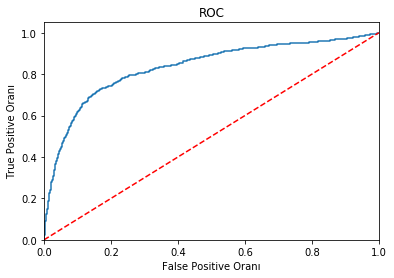

In [130]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()


In [131]:
logit_roc_auc

0.7213816164940414

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 42)

In [135]:
loj = LogisticRegression(solver= 'liblinear')
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
accuracy_score(y_test, loj_model.predict(X_test))

0.8533519553072626

In [137]:
y_pred = loj_model.predict(X_test)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       591
           1       0.60      0.48      0.53       125

    accuracy                           0.85       716
   macro avg       0.75      0.71      0.72       716
weighted avg       0.84      0.85      0.85       716



In [139]:
cross_val_score(loj_model , X_test, y_test , cv = 10).mean()

0.8521322378716745

## DECISION TREE

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train,y_train)

In [142]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [144]:
cart_grid = {"max_depth": range(1,10), 
             "min_samples_split": list(range(2,50))}

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart,cart_grid, cv = 10,n_jobs=-1,verbose=2)
cart_cv_model = cart_cv.fit(X_train , y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   45.8s finished


In [147]:
print("En iyi parametreler:" + str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 3, 'min_samples_split': 2}


In [148]:
cart = tree.DecisionTreeClassifier(max_depth = 3 , min_samples_split=2)
cart_tuned = cart.fit(X_train, y_train)

In [149]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8729050279329609

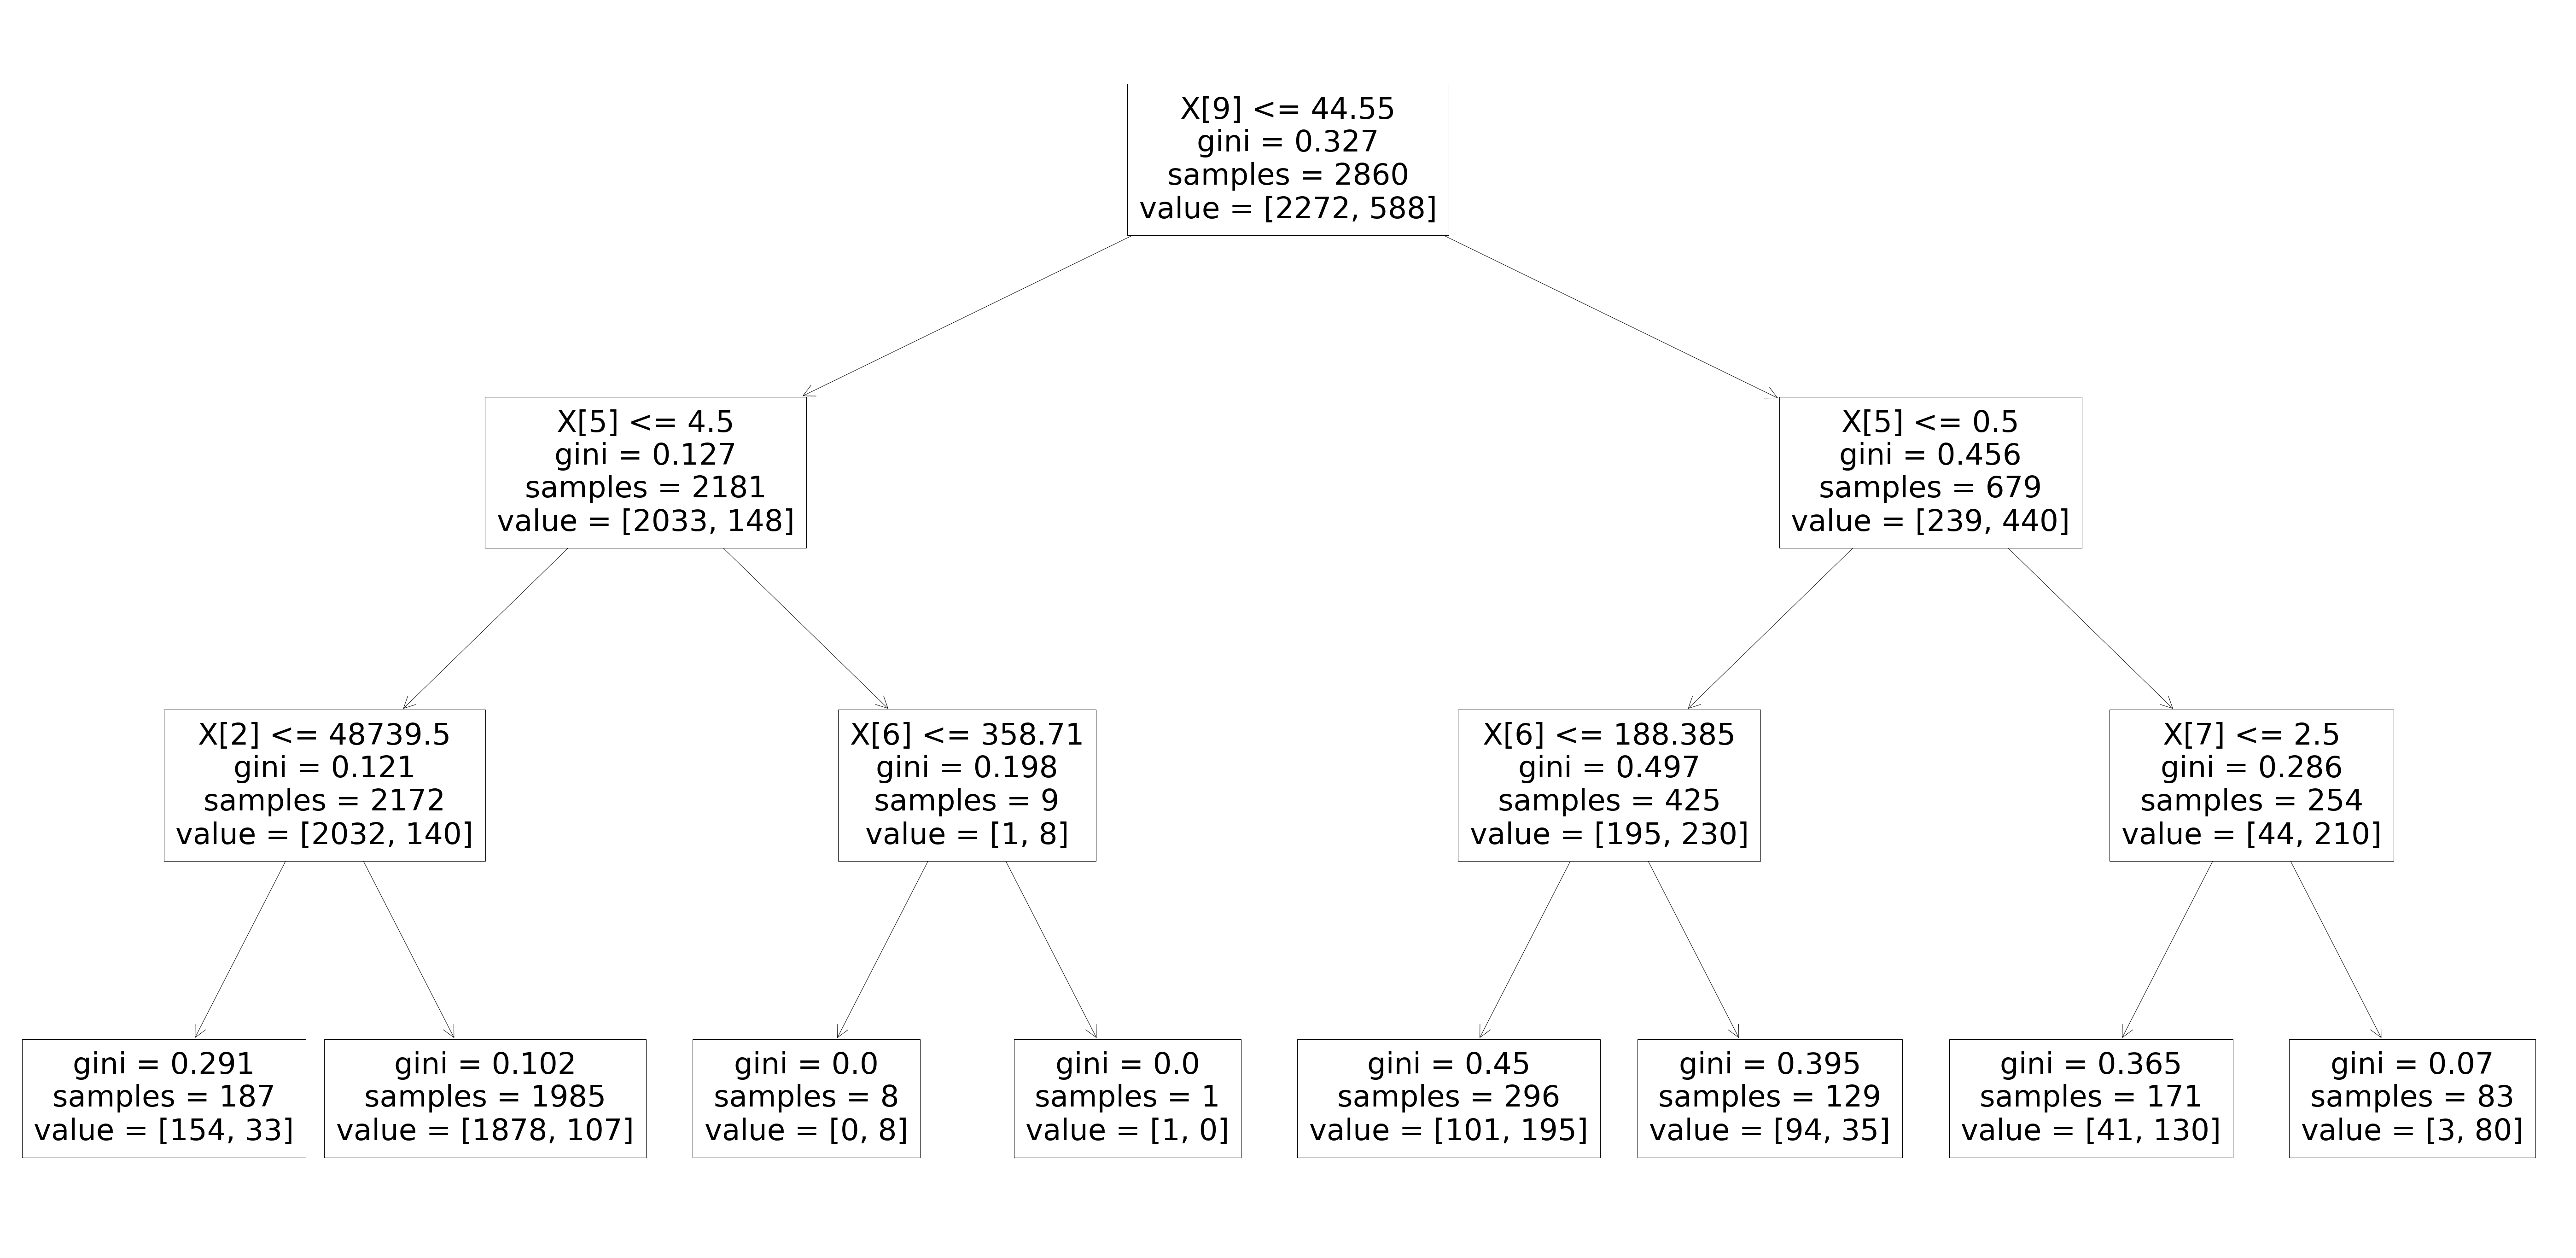

In [150]:
plt.figure(figsize=(100,50))
tree.plot_tree(cart_tuned);

## RAND0M FOREST

In [152]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9036312849162011

In [156]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,50,100],
             "min_samples_split": [5,10]}

In [158]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [159]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [161]:
rf_tuned = RandomForestClassifier(max_depth=10,
                                  max_features= 2,
                                  min_samples_split= 5,
                                  n_estimators= 100)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8980446927374302

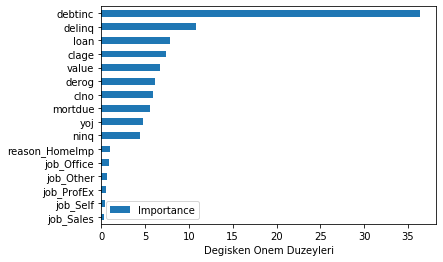

In [162]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh")
plt.xlabel("Degisken Onem Duzeyleri")
plt.show()

## Neural Network

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [166]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)
mlp_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [167]:
y_pred = mlp_model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8994413407821229

In [168]:
mlp_param2 = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(10,10,10),
                                    (20,20), 
                                    (100,50,150), 
                                    (300,200,150),
                                    (3,5),
                                    (5,3)],
             "activation": ["relu","logistic"],
             "solver": ["lbfgs", "adam","sgd"]}


mlp_cv_model = GridSearchCV(mlp_model, mlp_param2, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 78.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(100, 20),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
        

In [169]:
mlp_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (300, 200, 150),
 'solver': 'adam'}

In [171]:
mlp_tuned = MLPClassifier(alpha= 0.1, hidden_layer_sizes=(300,200,150), activation="relu", solver="adam")
mlp_tuned.fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.8938547486033519

## SUPPORT VECTOR MACHİNE

In [172]:
svc_params = {'C' : np.arange(1,10), 'kernel' : ['linear' , 'rbf' ,'poly']}

svc=SVC()

svc_cv_model= GridSearchCV(svc, svc_params, cv=10, n_jobs=-1,verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print('En iyi paramey-treler:' + str(svc_cv_model.best_params_))

In [ ]:
svc_tuned = SVC(C=10 , gamma=0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred)

# GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

In [ ]:
nb_model.predict(X_test)[0:10]

In [ ]:
nb_model.predict_proba(X_test)[0:10]

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred)

In [ ]:
cross_val_score(nb_model , X_test , y_test , cv=10).mean()

In [ ]:
nb_params = {'priors' : [(0.1,0.9) ,(0.2,0.8) , (0.3 , 0.7)] }
nb = GaussianNB()
nb_cv = GridSearchCV(nb, nb_params ,cv =10)
nb_cv.fit(X_train, y_train)
print('En iyi skor:'  + str(nb_cv.best_score_) )
print('En iyi parametreler:'  + str(nb_cv.best_params_))

In [ ]:
nb = GaussianNB(priors= (0.3, 0.7))
nb_model = nb.fit(X_train, y_train)
nb_model

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
cross_val_score(nb_model , X_test , y_test , cv=10).mean()

# BERNOULLİ NAİVE BAYES

In [ ]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
bnb_model

In [ ]:
bnb_model.predict(X_test)[0:10]

In [ ]:
bnb_model.predict_proba(X_test)[0:10]

In [ ]:
y_pred = bnb_model.predict(X_test)

In [ ]:
accuracy_score(y_test , y_pred)

## MULTİNOMİAL NAİVE BAYES

In [ ]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
mnb_model

In [ ]:
y_pred = mnb_model.predict(X_test)
accuracy_score(y_test , y_pred)

## Cat Boost

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [ ]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
catb_params = {"iterations": [200,500],
              "learning_rate": [0.01,0.05,0.1],
              "depth": [3,5,8]}

In [ ]:
catb = CatBoostClassifier()

In [ ]:
catb_cv = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2)

In [ ]:
catb_cv.fit(X_train, y_train)

In [ ]:
print(f"best params: {catb_cv.best_params_}")

In [ ]:
catb = CatBoostClassifier(depth = 8,
                                iterations = 200,
                                learning_rate = 0.01)

In [ ]:
catb_tuned = catb.fit(X_train, y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

## KNeighbors

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train , y_train)
knn_model

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
knn_params = {'n_neighbors' : np.arange(1,20) , "metric" : ["minkowski" , "euclidean" , "manhattan" , ]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params , cv = 10)

knn_cv.fit(X_train,y_train)

In [ ]:
print("En iti skoor"  + str(knn_cv.best_score_))
print("en iyi parametreler" + str(knn_cv.best_params_))

In [ ]:
knn_cv.algorithm = "brute"
knn_cv.n_neighbors = 10
knn_cv.metric = "manhattan"
knn_cv.leaf_size = 5
knn_tuned = knn_cv.fit(xtrain, ytrain)
y_pred = knn_tuned.predict(xtest)
print(accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

In [ ]:
modeller = [
    knn_tuned,
    bnb_model,
    mnb_model,
    cart_tuned,
    nb_model,
    rf_tuned,
    mlp_tuned,
    catb_tuned,
    svc_tuned,
    loj_model
   
    
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="b")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');